In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
os.chdir(r'/home/devbox2/chetanya/dataSheets/')

In [3]:
os.getcwd()

'/home/devbox2/chetanya/dataSheets'

In [4]:
data=pd.read_csv('retail_new_clean_cluster1.csv')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,UnitPrice,CountInvoices,logCountInvoices,logUnitPrice,Cluster_index
0,536367,84879,assortedcolourbirdornament,1.69,1455,3.162863,0.227887,1
1,536392,84879,assortedcolourbirdornament,1.69,1455,3.162863,0.227887,1
2,536395,84879,assortedcolourbirdornament,1.69,1455,3.162863,0.227887,1
3,536408,84879,assortedcolourbirdornament,1.69,1455,3.162863,0.227887,1
4,536460,84879,assortedcolourbirdornament,1.69,1455,3.162863,0.227887,1


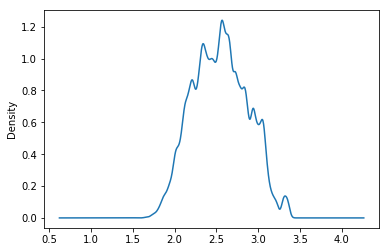

In [6]:
data['logCountInvoices'].plot(kind='kde')
plt.show()

In [7]:
data['logCountInvoices'].describe()

count    319340.000000
mean          2.545208
std           0.325858
min           1.531479
25%           2.301030
50%           2.546543
75%           2.783904
max           3.354108
Name: logCountInvoices, dtype: float64

In [8]:
data['CountInvoices'].describe()

count    319340.000000
mean        464.233694
std         375.001899
min          34.000000
25%         200.000000
50%         352.000000
75%         608.000000
max        2260.000000
Name: CountInvoices, dtype: float64

In [9]:
rate_on_count=lambda x:(x/data['logCountInvoices'].max())*10

In [10]:
data['rating']=data['logCountInvoices'].apply(rate_on_count)

In [11]:
Invoice_Description_logCountInvoiceRating=data[['InvoiceNo','Description','rating']]

In [12]:
Invoice_Description_logCountInvoiceRating.head()

,InvoiceNo,Description,rating
0,536367,assortedcolourbirdornament,9.429817
1,536392,assortedcolourbirdornament,9.429817
2,536395,assortedcolourbirdornament,9.429817
3,536408,assortedcolourbirdornament,9.429817
4,536460,assortedcolourbirdornament,9.429817


In [13]:
Invoice_Description_logCountInvoiceRating.to_csv('Invoice_Description_logCountInvoiceRating.csv', index=False)

In [14]:
ratings=Invoice_Description_logCountInvoiceRating.sort_values(by='InvoiceNo')

In [15]:
ratings.to_csv('Invoice_Description_logCountInvoiceRating(sorted).csv', index=False)

In [29]:
ratings=pd.read_csv('test_model.csv')

In [30]:
ratings.head(10)


,InvoiceNo,Description,ratings
0,536367,assortedcolourbirdornament,26.735219
1,536367,feltcraftprincesscharlottedoll,14.830927
2,536367,boxof6assortedcolourteaspoons,12.606288
3,536367,homebuildingblockword,8.824402
4,536367,lovebuildingblockword,8.824402
5,536367,doormatnewengland,15.720783
6,536367,poppy'splayhousekitchen,6.228990
7,536367,poppy'splayhousebedroom,6.228990
8,536368,bluecoatrackparisfashion,36.802974
9,536368,jammakingsetwithjars,63.197026


In [32]:
matrix=ratings.pivot_table(index=['InvoiceNo'],columns=['Description'],values=['ratings']).fillna(0)

In [34]:
matrix=matrix.ratings

In [35]:
matrix.head()

Description,10colourspaceboypen,12colouredpartyballoons,12ivoryrosepegplacesettings,12messagecardswithenvelopes,12pencilsmalltubewoodland,12pencilssmalltuberedretrospot,12pencilssmalltubeskull,12pencilstalltubeposy,12pencilstalltuberedretrospot,12pencilstalltubeskulls,...,you'reconfusingmemetalsign,yuletideimagesgiftwrapset,zincfolkartsleighbells,zincheartflowert-lightholder,zincheartlatticet-lightholder,zincherbgardencontainer,zincmetalheartdecoration,zinct-lightholderstarlarge,zinct-lightholderstarssmall,zincwilliewinkiecandlestick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
'''def pearson(s1,s2):
    s1_c=s1-s1.mean()
    s2_c=s2-s2.mean()
    return np.sum(s1_c*s2_c)/ np.sqrt(np.sum(s1_c**2)*np.sum(s2_c**2))
'''    

'def pearson(s1,s2):\n    s1_c=s1-s1.mean()\n    s2_c=s2-s2.mean()\n    return np.sum(s1_c*s2_c)/ np.sqrt(np.sum(s1_c**2)*np.sum(s2_c**2))\n'

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
cosine_similarity([matrix['10colourspaceboypen']], [matrix['12colouredpartyballoons']])

array([[0.00221767]])

In [38]:
def get_recommendations(item_name, matrix, num):
    items=[]
    for description in matrix.columns:
        if description==item_name:
            continue
        sim=cosine_similarity([matrix[item_name]],[matrix[description]])
        if np.isnan(sim):
            continue
        else:
            items.append((description, sim))   
        
    items.sort(key=lambda tup: tup[1], reverse=True)
    return items[:num]
            

In [45]:
%timeit recs=get_recommendations('assortedcolourbirdornament', matrix, 5)

3.68 s ± 5.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
recs

[('paintedmetalpearsassorted', array([[0.23212064]])),
 ('ivoryhangingdecorationegg', array([[0.10722693]])),
 ('eastertinbunnybouquet', array([[0.10047293]])),
 ('orangescentedset/9t-lights', array([[0.05927982]])),
 ('homebuildingblockword', array([[0.05431184]]))]